In [5]:
!pip install pandas matplotlib seaborn scikit-learn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
from sklearn.preprocessing import StandardScaler
import numpy as np


warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)


print('Bibliotecas carregadas com sucesso.')

Bibliotecas carregadas com sucesso.


## 1. Carregamento dos Dados

Leitura e concatenação dos arquivos CSV do CPGF (a partir de 2022) armazenados na pasta `datasets`.

> **Nota:** Os CSVs do Portal da Transparência utilizam separador `;` e encoding `latin-1`.

In [ ]:
# --- Definição de caminhos ---
# Execução local:
# --- Carregamento de todos os CSVs ---

csv_files = sorted(glob.glob(os.path.join("../datasets", '*.csv')))

print(f'Arquivos encontrados: {len(csv_files)}')

aux=0
dfs = []

for f in csv_files:

    df_temp = pd.read_csv(f, sep=';', encoding='latin-1', decimal = ',')

    dfs.append(df_temp)

    aux+=1

    if aux <= 3:

        print(f'  - {os.path.basename(f)}')

    elif aux == 3:    

        print("  - ...")



df = pd.concat(dfs, ignore_index=True)

print(f'\nTotal de registros carregados: {df.shape[0]:,}')

print(f'Total de colunas: {df.shape[1]} \n')

print(f'Nomes das Colunas: {df.columns}')

Arquivos encontrados: 36
  - 202201_CPGF.csv
  - 202202_CPGF.csv
  - 202203_CPGF.csv

Total de registros carregados: 411,652
Total de colunas: 15 

Nomes das Colunas: Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'ANO EXTRATO', 'MÊS EXTRATO', 'CPF PORTADOR', 'NOME PORTADOR',
       'CNPJ OU CPF FAVORECIDO', 'NOME FAVORECIDO', 'TRANSAÇÃO',
       'DATA TRANSAÇÃO', 'VALOR TRANSAÇÃO'],
      dtype='str')


## 2. Tipos de dados

Altera o tipo dos dados das colunas 'DATA TRANSAÇÃO' e 'VALOR TRANSAÇÃO'

In [20]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 411652 entries, 0 to 411651
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CÓDIGO ÓRGÃO SUPERIOR   411652 non-null  int64  
 1   NOME ÓRGÃO SUPERIOR     411652 non-null  str    
 2   CÓDIGO ÓRGÃO            411652 non-null  int64  
 3   NOME ÓRGÃO              411652 non-null  str    
 4   CÓDIGO UNIDADE GESTORA  411652 non-null  int64  
 5   NOME UNIDADE GESTORA    411652 non-null  str    
 6   ANO EXTRATO             411652 non-null  int64  
 7   MÊS EXTRATO             411652 non-null  int64  
 8   CPF PORTADOR            312122 non-null  str    
 9   NOME PORTADOR           411652 non-null  str    
 10  CNPJ OU CPF FAVORECIDO  411652 non-null  int64  
 11  NOME FAVORECIDO         411652 non-null  str    
 12  TRANSAÇÃO               411652 non-null  str    
 13  DATA TRANSAÇÃO          312122 non-null  str    
 14  VALOR TRANSAÇÃO         411652 

In [21]:
#Tipo de dados e criação de id's
# A coluna já está como float, mas se caso não força a transformação str->float
if df['VALOR TRANSAÇÃO'].dtype == 'object':
    df['VALOR TRANSAÇÃO'] = (
        df['VALOR TRANSAÇÃO']
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

# str-> datetime aaaa-mm-dd
df['DATA TRANSAÇÃO'] = pd.to_datetime(
    df['DATA TRANSAÇÃO'],
    format='%d/%m/%Y'
)

df['ID'] = range(1, len(df) + 1)
print("Tipo alterado em VALOR TRANSAÇÃO para ",df['VALOR TRANSAÇÃO'].dtype)
print("Tipo alterado em DATA TRANSAÇÃO para ",df['DATA TRANSAÇÃO'].dtype, "\n")
print("Sobre as colunas:")
df.dtypes

Tipo alterado em VALOR TRANSAÇÃO para  float64
Tipo alterado em DATA TRANSAÇÃO para  datetime64[us] 

Sobre as colunas:


CÓDIGO ÓRGÃO SUPERIOR              int64
NOME ÓRGÃO SUPERIOR                  str
CÓDIGO ÓRGÃO                       int64
NOME ÓRGÃO                           str
CÓDIGO UNIDADE GESTORA             int64
NOME UNIDADE GESTORA                 str
ANO EXTRATO                        int64
MÊS EXTRATO                        int64
CPF PORTADOR                         str
NOME PORTADOR                        str
CNPJ OU CPF FAVORECIDO             int64
NOME FAVORECIDO                      str
TRANSAÇÃO                            str
DATA TRANSAÇÃO            datetime64[us]
VALOR TRANSAÇÃO                  float64
ID                                 int64
dtype: object

## 3. Pré-visualização

In [42]:
# --- Visão geral do DataFrame ---
print('=== Primeiras linhas ===')
display(df.head(2))

=== Primeiras linhas ===


,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,ANO EXTRATO,MÊS EXTRATO,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO,ID
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110161,SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO,2022,1,***.177.590-**,EDSON LUIS GARCIA FAGUNDES,1368970000107,RANZAN & GRAF LTDA,COMPRA A/V - R$ - APRES,2021-08-12,40.6,1
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110161,SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO,2022,1,***.725.752-**,VIVIANE CORREA LIMA,84646934000195,PORTOSOFT COMERCIO DE PRODUTOS DE INFORMATICA ...,COMPRA A/V - R$ - APRES,2021-01-12,225.0,2


## 4. Exploração dos Dados - Estatísticas Descritivas

### 4.1 Valor da Transação

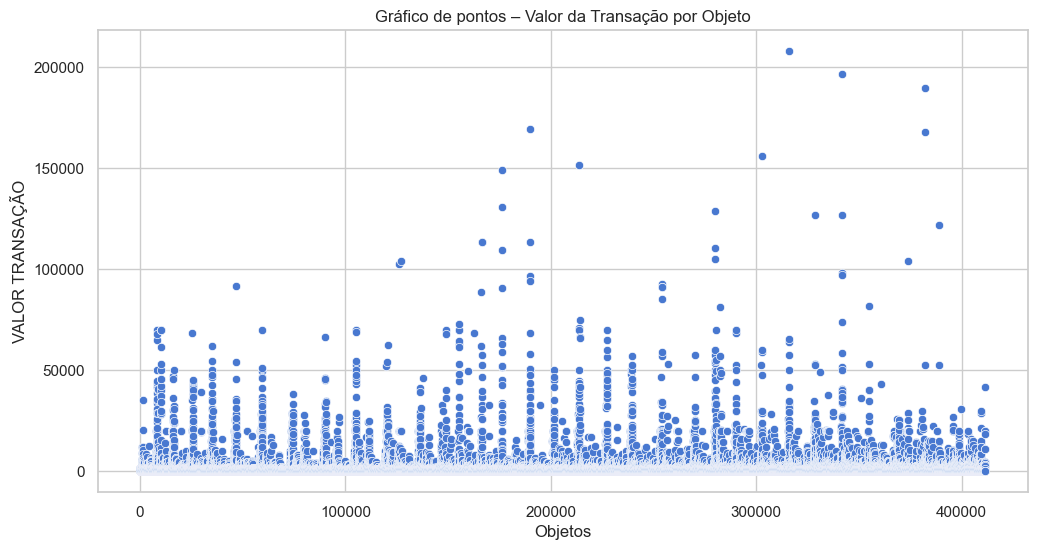

In [103]:
sns.scatterplot(
    x=df.index,
    y=df['VALOR TRANSAÇÃO']
)

plt.xlabel('Objetos')
plt.ylabel('VALOR TRANSAÇÃO')
plt.title('Gráfico de pontos – Valor da Transação por Objeto')
plt.show()

In [48]:
print('=== Estatísticas descritivas do valor da transação ===')
display(df['VALOR TRANSAÇÃO'].describe())

=== Estatísticas descritivas do valor da transação ===


count    411652.000000
mean        683.603481
std        2164.235331
min           0.040000
25%         125.000000
50%         356.710000
75%        1000.000000
max      207953.600000
Name: VALOR TRANSAÇÃO, dtype: float64

### 4.2 Atributos Categóricos

In [50]:
print('\n=== Estatísticas descritivas (atributos categóricos) ===')
display(df.describe(include='object'))


=== Estatísticas descritivas (atributos categóricos) ===


,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,NOME FAVORECIDO,TRANSAÇÃO
count,411652,411652,411652,312122,411652,411652,411652
unique,30,194,1255,9883,9932,60321,8
top,Ministério da Justiça e Segurança Pública,Polícia Federal,COORDENACAO GERAL DE ADMINISTRACAO CGAD/DLOG/,***.735.900-**,Sigiloso,Sigiloso,COMPRA A/V - R$ - APRES
freq,83599,79609,21527,1071,99530,99530,265854


In [63]:
print('Todos os tipos de transação:\n')
for item in df['TRANSAÇÃO'].unique():
    print(item)

Todos os tipos de transação:

COMPRA A/V - R$ - APRES
SAQUE CASH/ATM BB
SAQUE - INT$ - APRES
COMPRA A/V - INT$ - APRES
Informações protegidas por sigilo
COMP A/V-SOL DISP C/CLI-R$ ANT VENC
SAQUE MANUAL-CARTOES BB NA AGENCIA
SAQUE - R$ - APRES


### 4.3 Normalização dos Dados
Cria uma nova coluna com os valores de transação normalizados

**Técnicas comuns de normalização:**
- Min-Max Scaling: Transforma os valores para o intervalo [0, 1].
- Z-Score (Standardization): Centraliza na média 0 e desvio padrão 1.
- Utilizaremos StandardScaler (Z-Score) neste projeto, pois é mais robusto na presença de outliers que a normalização Min-Max.

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['VALOR TRANSAÇÃO']])
df['VALOR NORMALIZADO'] = X_scaled

In [80]:
print('=== Estatísticas descritivas do valor da transação ===')
display(df['VALOR NORMALIZADO'].describe().round(2))

=== Estatísticas descritivas do valor da transação ===


count    411652.00
mean         -0.00
std           1.00
min          -0.32
25%          -0.26
50%          -0.15
75%           0.15
max          95.77
Name: VALOR NORMALIZADO, dtype: float64

## 5. Qualidade dos Dados

### 5.1 Fundamentação Teórica
Os principais problemas tratados nesta etapa são:

### 5.2 Agregação dos Dados
Nesta etapa, criamos um novo dataframe agrupando os dados por CPF do portador do cartão. O objetivo é transformar os dados em um perfil de comportamento por portador do cartão, visando que os algoritmos de mineração identifiquem padrões e anomalias do usuário.

- Cada linha da base agregada representa um portador

In [113]:
# TODO: Ajustar os nomes das colunas conforme a base real do CPGF
col_cpf = "CPF PORTADOR"
col_valor = "VALOR TRANSAÇÃO"

df_agregado = df.groupby(col_cpf).agg(
     total_gasto  = (col_valor, "sum"),
     media_gasto  = (col_valor, "mean"),
     qtd_transacoes = (col_valor, "count"),
     max_gasto    = (col_valor, "max")
 ).reset_index()

print(f"Portadores únicos: {len(df_agregado[col_cpf].unique())}")

Portadores únicos: 9883


In [114]:
print("\n=== Primeiras linhas do DataFrame agregado ===")
display(df_agregado.head(10))
print("\n=== Estatísticas descritivas do perfil agregado ===")
display(df_agregado.describe().round(2))
print("Agregação concluída.")


=== Primeiras linhas do DataFrame agregado ===


,CPF PORTADOR,total_gasto,media_gasto,qtd_transacoes,max_gasto
0,***.000.021-**,50093.15,279.850000,179,800.00
1,***.000.060-**,828.00,828.000000,1,828.00
2,***.000.230-**,1661.96,151.087273,11,694.10
3,***.000.251-**,1250.00,625.000000,2,1000.00
4,***.000.379-**,3844.95,349.540909,11,1200.00
5,***.000.384-**,1167.99,166.855714,7,299.99
6,***.000.478-**,8528.51,164.009808,52,1000.00
7,***.000.567-**,2849.30,237.441667,12,1237.95
8,***.000.632-**,8950.00,639.285714,14,1000.00
9,***.000.716-**,197.40,8.972727,22,9.20



=== Estatísticas descritivas do perfil agregado ===


,total_gasto,media_gasto,qtd_transacoes,max_gasto
count,9883.00,9883.00,9883.00,9883.00
mean,14938.68,674.79,31.58,1902.26
std,30997.99,2458.03,53.90,4076.50
min,1.00,1.00,1.00,1.00
25%,2139.30,249.90,5.00,700.00
50%,6157.53,414.74,14.00,1085.50
75%,16377.44,708.56,35.00,1876.82
max,1220451.04,189650.00,1071.00,189650.00


Agregação concluída.


### 5.2.1 Normalização da base agregada

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agregado[['total_gasto']])
df_agregado['VALOR NORMALIZADO'] = X_scaled

### 5.3 Tratamento de Ausência de Valores
Valores ausentes podem surgir por falhas de coleta ou campos opcionais. A estratégia padrão inclui eliminar as linhas com valores ausentes em atributos críticos. a principio, nao eliminamos pois nao usaremos as colunas que contem dados nulos no modelo.

(*discutir depois aula 2 qualidade dos dados)

### 5.4 Tratamento de Ruído e Dados Inconsistentes
Para objetos, ruído é um objeto estranho. Para atributos, ruído refere-se à modificação dos valores originais. entendemos que ruído pode confundir o algoritmo.

(verificar se saque pode ser um ruido)

In [118]:
# --- 3.2 Análise de valores ausentes ---
print('=== Valores ausentes por coluna ===')
nulos = df.isnull().sum()
nulos_pct = (nulos / len(df)) * 100
resumo_nulos = pd.DataFrame({'Nulos': nulos, '% do Total': nulos_pct.round(2)})
display(resumo_nulos[resumo_nulos['Nulos'] > 0].sort_values('Nulos', ascending=False))
     

=== Valores ausentes por coluna ===


,Nulos,% do Total
CPF PORTADOR,99530,24.18
DATA TRANSAÇÃO,99530,24.18
